## Different k's average CSG's values

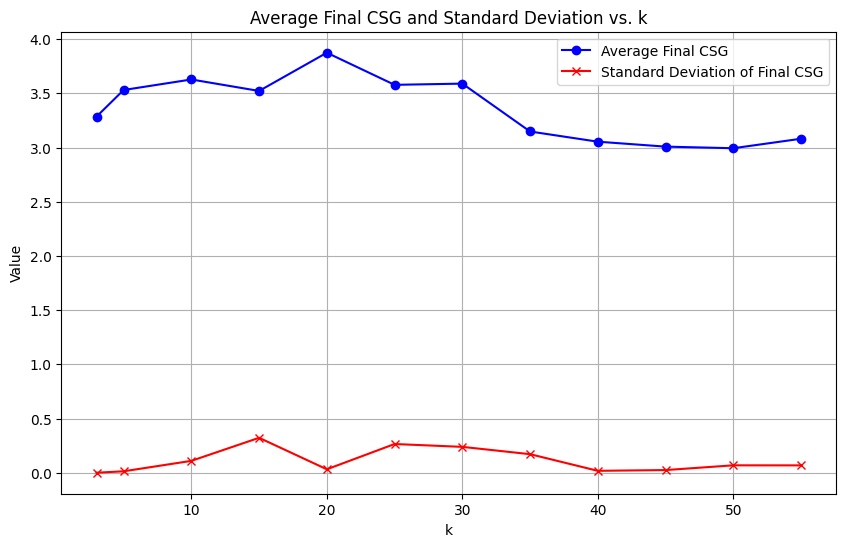

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Extract k values, average CSG, and standard deviation from the data
k_values = [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
average_csg = [
    3.2848795288508446,
    3.530456792772311,
    3.627658134037406,
    3.5218768911602965,
    3.8744791368067197,
    3.5782483640999296,
    3.589454648550136,
    3.147807187739366,
    3.053726730837358,
    3.008250770663551,
    2.993410763237586,
    3.081012868554353
]
std_csg = [
    4.4524676109846145e-05,
    0.013165362399802366,
    0.10942802308809327,
    0.32215355740035384,
    0.03164331351053653,
    0.2648758873236434,
    0.23854981586823168,
    0.17110153019320343,
    0.01754301845444723,
    0.024561419640476933,
    0.06826033063914803,
    0.06774037411833157
]

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the average CSG with a blue line
plt.plot(k_values, average_csg, label='Average Final CSG', color='blue', marker='o')

# Plot the standard deviation with a red line
plt.plot(k_values, std_csg, label='Standard Deviation of Final CSG', color='red', marker='x')

# Add title and labels
plt.title('Average Final CSG and Standard Deviation vs. k')
plt.xlabel('k')
plt.ylabel('Value')

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

## Different executions average CSG's values

C:\Users\Haji\AppData\Local\Temp\ipykernel_4280\2436406439.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping


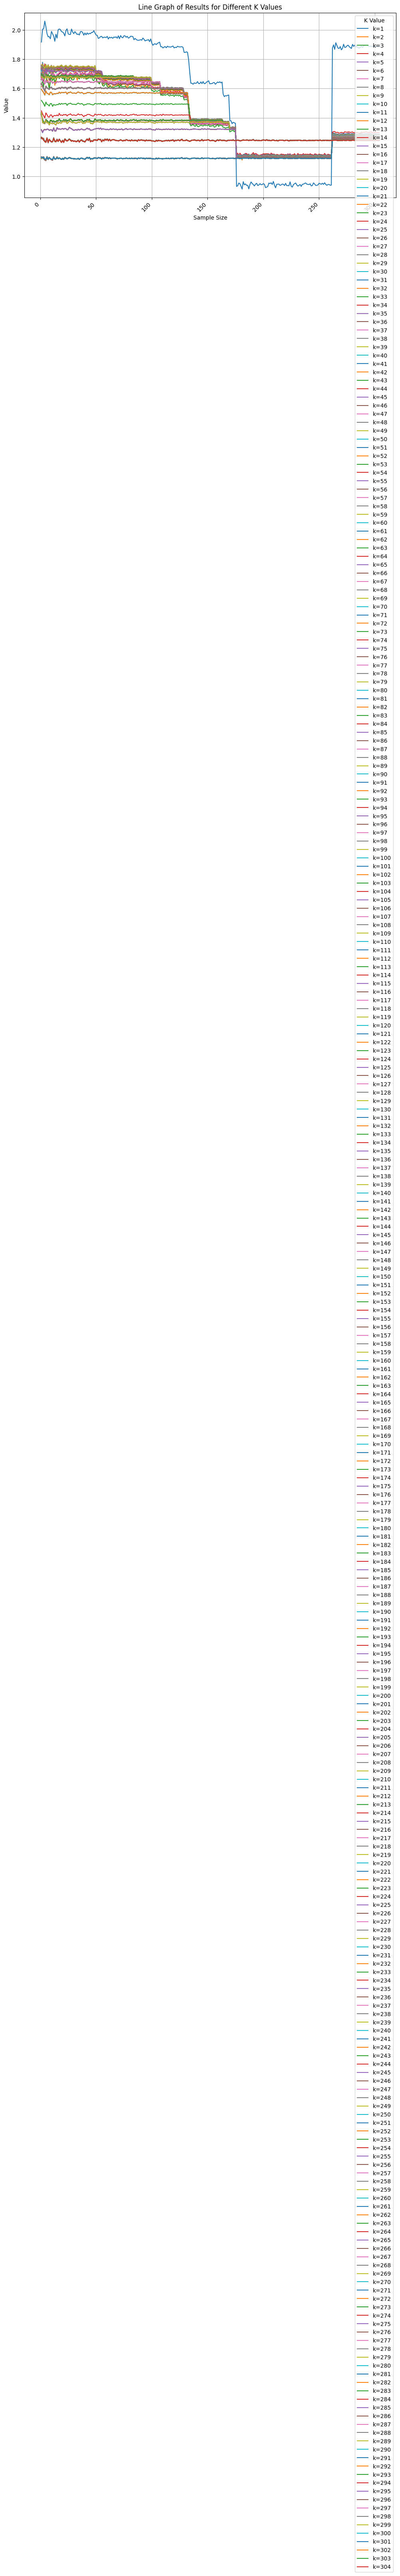

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CSV file
file_path = r"D:\Complexities_papers\data.csv"  # Use raw string to avoid backslash issues

try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Assuming the first column is 'Sample Size \ K' and the rest are 'k=...'
    # Extract the 'K' values from the column names
    k_values = [int(col.split('=')[1]) for col in df.columns if col.startswith('k=')]

    # Set 'Sample Size \ K' as the index for plotting
    df.set_index('Sample Size \\ K', inplace=True)

    # Plotting the line graph
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed

    for k in k_values:
        column_name = f'k={k}'
        plt.plot(df.index, df[column_name], label=f'k={k}')

    # Add labels and title
    plt.xlabel('Sample Size')
    plt.ylabel('Value')
    plt.title('Line Graph of Results for Different K Values')
    plt.legend(title='K Value')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping

    # Show the plot
    plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {file_path}")
except KeyError as e:
    print(f"Error: Column not found in the CSV file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully.


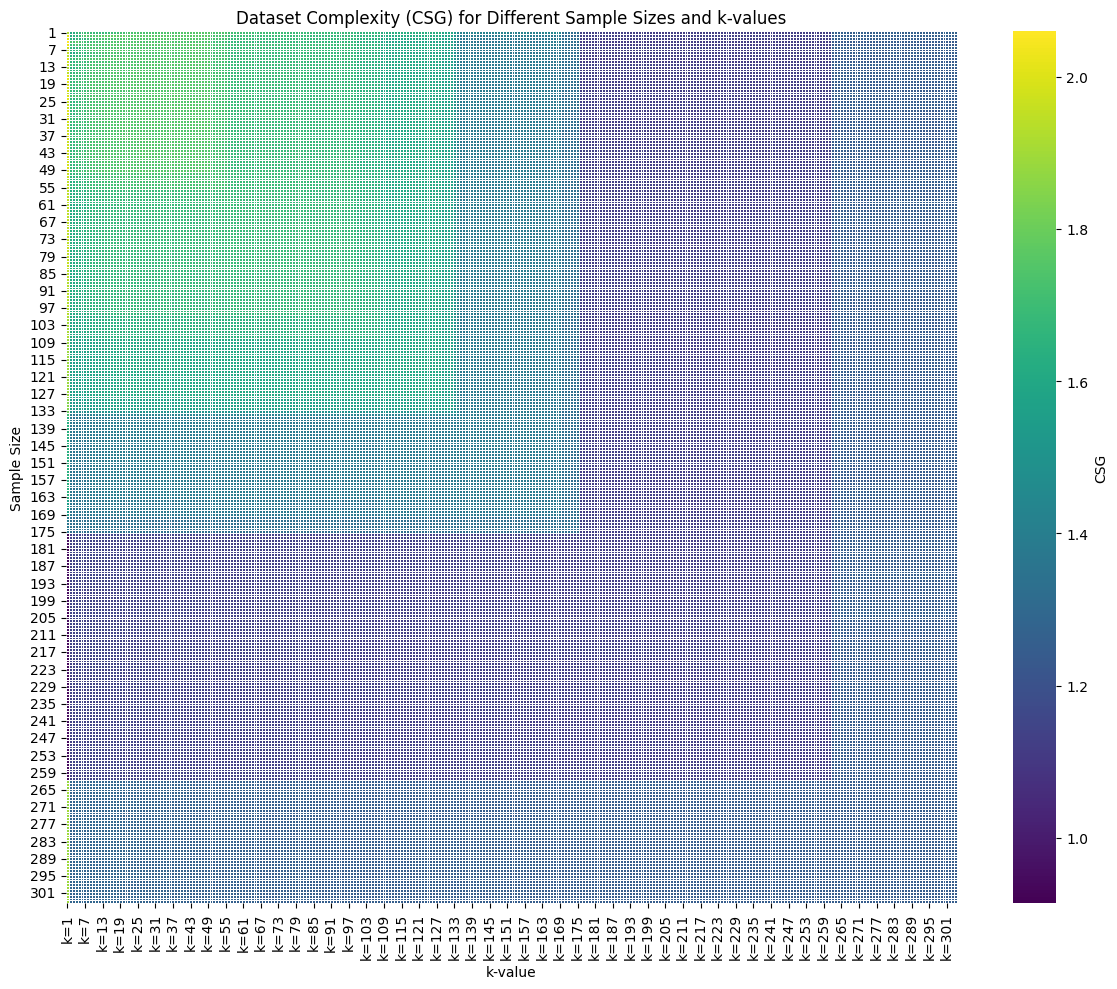

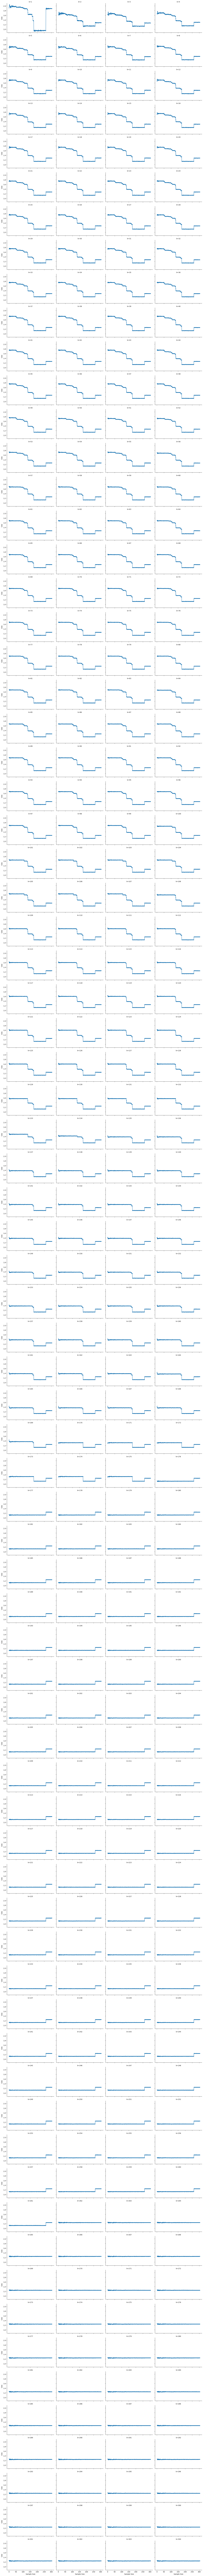

Skipping Side-by-Side Bar Chart due to a large number of sample sizes. Consider focusing on a subset.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"D:\Complexities_papers\data.csv"  # Use raw string for file path

try:
    df = pd.read_csv(file_path)
    df = df.rename(columns={df.columns[0]: 'Sample Size'}).set_index('Sample Size')
    k_values_cols = [col for col in df.columns if col.startswith('k=')]
    sample_sizes = df.index.tolist()

    if df.empty:
        print("Error: The CSV file is empty.")
    elif not k_values_cols:
        print("Error: No columns with the format 'k=...' found in the CSV.")
    else:
        print("Data loaded successfully.")

        # 1. Heatmap
        plt.figure(figsize=(12, 10))  # Adjust figure size for larger data
        sns.heatmap(df[k_values_cols], annot=False, cmap="viridis", linewidths=.5, cbar_kws={'label': 'CSG'}) # Removed annot for 304 rows
        plt.title("Dataset Complexity (CSG) for Different Sample Sizes and k-values")
        plt.xlabel("k-value")
        plt.ylabel("Sample Size")
        plt.tight_layout()
        plt.show()

        # 2. Faceted Line Plots
        df_long = df.reset_index().melt(id_vars='Sample Size', var_name='k', value_name='CSG')
        g = sns.FacetGrid(df_long, col="k", col_wrap=4, height=3, aspect=1.5) # Adjust col_wrap as needed
        g.map(plt.plot, "Sample Size", "CSG", marker=".")
        g.set_axis_labels("Sample Size", "CSG")
        g.set_titles("{col_name}")
        g.add_legend()
        plt.tight_layout()
        plt.show()

        # 3. Side-by-Side Bar Chart (limited to a subset for clarity with large data)
        if len(sample_sizes) <= 20: # Adjust the limit as needed
            df_melted = df.reset_index().melt(id_vars='Sample Size', var_name='k', value_name='CSG')
            plt.figure(figsize=(16, 8))
            sns.barplot(x='Sample Size', y='CSG', hue='k', data=df_melted, dodge=True)
            plt.title("Dataset Complexity (CSG) Comparison by k-value for Each Sample Size (Subset)")
            plt.ylabel("CSG")
            plt.xlabel("Sample Size")
            plt.legend(title="k-value")
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
        else:
            print("Skipping Side-by-Side Bar Chart due to a large number of sample sizes. Consider focusing on a subset.")

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

file_path = r"D:\dataset_complexity\data.csv"

try:
    df = pd.read_csv(file_path)
    df = df.rename(columns={df.columns[0]: 'Sample Size'}).set_index('Sample Size')
    k_values_cols = [col for col in df.columns if col.startswith('k=')]
    sample_sizes = df.index.tolist()
    k_values = [int(col.split('=')[1]) for col in k_values_cols]

    if df.empty:
        print("Error: The CSV file is empty.")
    elif not k_values_cols:
        print("Error: No columns with the format 'k=...' found in the CSV.")
    else:
        print("Data loaded successfully for contour plot with discrete levels.")

        # Create a meshgrid for interpolation
        xi = np.linspace(min(k_values), max(k_values), 200)
        yi = np.linspace(min(sample_sizes), max(sample_sizes), 200)
        xi, yi = np.meshgrid(xi, yi)

        # Convert DataFrame to long format
        df_long = df.reset_index().melt(id_vars='Sample Size', var_name='k_str', value_name='CSG')
        df_long['k'] = df_long['k_str'].str.split('=').str[1].astype(int)

        # Interpolate the data
        zi = griddata((df_long['k'], df_long['Sample Size']), df_long['CSG'], (xi, yi), method='cubic')

        # Define discrete CSG levels (adjust these based on your data)
        levels = np.arange(df_long['CSG'].min() - 0.1, df_long['CSG'].max() + 0.1, 0.2) # Example: Levels every 0.2
        # You can also define specific levels like: levels = [1.5, 1.7, 1.9, 2.1]

        # Create the filled contour plot with discrete levels
        plt.figure(figsize=(10, 8))
        contour = plt.contourf(xi, yi, zi, levels=levels, cmap='viridis', extend='both') # 'extend' handles values outside the defined levels
        cbar = plt.colorbar(contour, label='CSG', ticks=levels) # Show ticks at the defined levels
        plt.xlabel("k-value")
        plt.ylabel("Sample Size")
        plt.title("CSG Value Grouping (Contour Plot)")
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully for contour plot with discrete levels.
An error occurred: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U12'), dtype('float64')) -> None


## Nations dataset

Data loaded successfully for 3D surface plot.


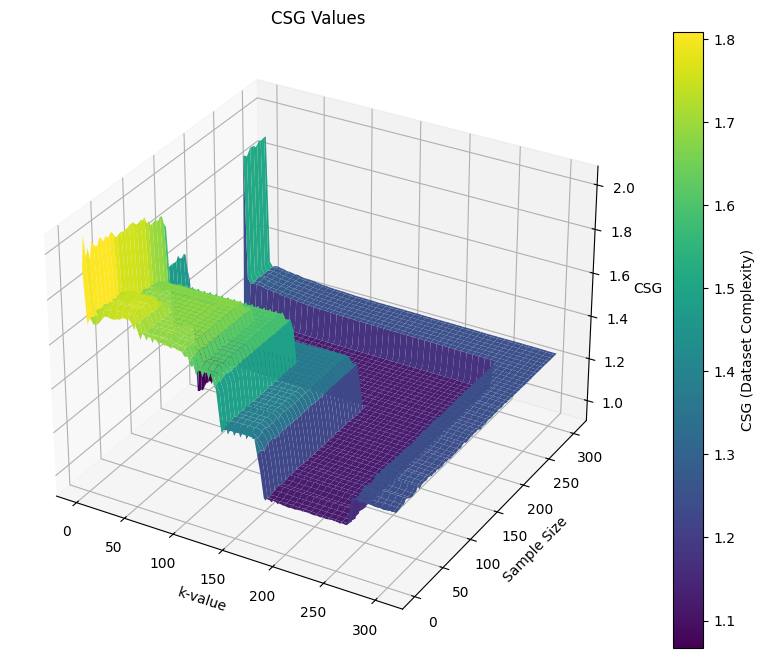

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

file_path = r"D:\dataset_complexity\data.csv"

try:
    df = pd.read_csv(file_path, index_col=0)  # First column as index (Sample_size1, etc.)
    df.index = [f"Sample_size{i+1}" for i in range(len(df))]  # Ensure consistent index naming
    k_values_cols = [col for col in df.columns if col.startswith('k=')]
    sample_sizes = np.arange(1, len(df) + 1)  # Numeric sample sizes (1 to 304)
    k_values = [int(col.split('=')[1]) for col in k_values_cols]  # k=1 to k=304

    if df.empty:
        print("Error: The CSV file is empty.")
    elif not k_values_cols:
        print("Error: No columns with the format 'k=...' found in the CSV.")
    else:
        print("Data loaded successfully for 3D surface plot.")

        # Convert to long format
        df_long = df.reset_index().melt(id_vars='index', var_name='k_str', value_name='CSG')
        df_long['k'] = df_long['k_str'].str.split('=').str[1].astype(int)
        df_long['Sample_size'] = df_long['index'].str.extract(r'(\d+)').astype(int)

        # Create meshgrid for interpolation
        xi = np.linspace(min(k_values), max(k_values), 100)  # Reduced resolution for large data
        yi = np.linspace(min(sample_sizes), max(sample_sizes), 100)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolate CSG values
        zi = griddata((df_long['k'], df_long['Sample_size']), df_long['CSG'], (xi, yi), method='cubic')

        # Plot
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')
        fig.colorbar(surf, label='CSG (Dataset Complexity)')
        ax.set_xlabel('k-value')
        ax.set_ylabel('Sample Size')
        ax.set_zlabel('CSG')
        #plt.title('3D Surface Plot of CSG Values')
        plt.title('CSG Values')
        plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully for 3D surface plot.


C:\Users\admin\AppData\Local\Temp\ipykernel_51732\1715094835.py:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


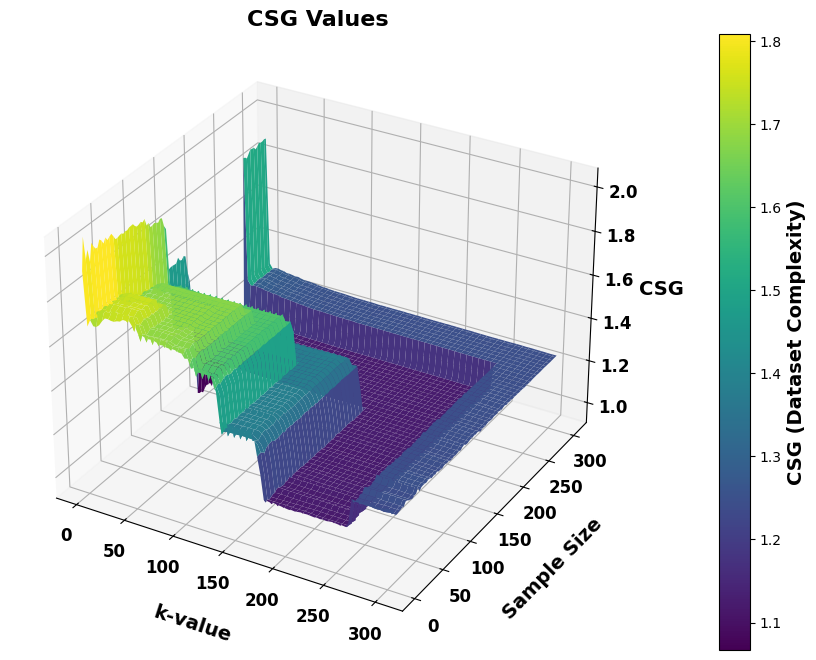

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# File path
file_path = r"D:\dataset_complexity\data.csv"

try:
    # Load data
    df = pd.read_csv(file_path, index_col=0)
    df.index = [f"Sample_size{i+1}" for i in range(len(df))]
    k_values_cols = [col for col in df.columns if col.startswith('k=')]
    sample_sizes = np.arange(1, len(df) + 1)
    k_values = [int(col.split('=')[1]) for col in k_values_cols]

    if df.empty:
        print("Error: The CSV file is empty.")
    elif not k_values_cols:
        print("Error: No columns with the format 'k=...' found in the CSV.")
    else:
        print("Data loaded successfully for 3D surface plot.")

        # Reshape data to long format
        df_long = df.reset_index().melt(id_vars='index', var_name='k_str', value_name='CSG')
        df_long['k'] = df_long['k_str'].str.split('=').str[1].astype(int)
        df_long['Sample_size'] = df_long['index'].str.extract(r'(\d+)').astype(int)

        # Generate meshgrid
        xi = np.linspace(min(k_values), max(k_values), 100)
        yi = np.linspace(min(sample_sizes), max(sample_sizes), 100)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolation
        zi = griddata((df_long['k'], df_long['Sample_size']), df_long['CSG'], (xi, yi), method='cubic')

        # Plotting
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

        # Colorbar with label
        cbar = fig.colorbar(surf, pad=0.1)
        cbar.set_label('CSG (Dataset Complexity)', fontsize=14, fontweight='bold', fontname='DejaVu Sans')

        # Axis Labels
        ax.set_xlabel('k-value', fontsize=14, fontweight='bold', labelpad=15, fontname='DejaVu Sans')
        ax.set_ylabel('Sample Size', fontsize=14, fontweight='bold', labelpad=15, fontname='DejaVu Sans')
        ax.set_zlabel('CSG', fontsize=14, fontweight='bold', labelpad=10, fontname='DejaVu Sans')

        # Tick Label Sizing + Font Weight (BOLD)
        for tick in ax.get_xticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')
        for tick in ax.get_zticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')

        # Title
        plt.title('CSG Values', fontsize=16, fontweight='bold', fontname='DejaVu Sans')

        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


## Location Dataset

Data loaded successfully for 3D surface plot.


C:\Users\admin\AppData\Local\Temp\ipykernel_22348\3234172932.py:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


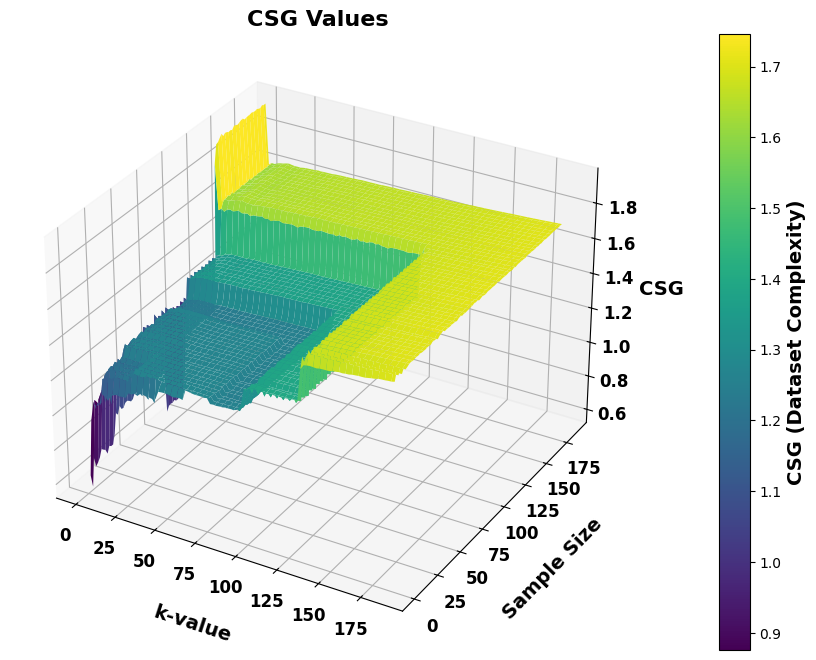

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# File path
file_path = r"D:\dataset_complexity\average_results.csv"

try:
    # Load data
    df = pd.read_csv(file_path, index_col=0)
    df.index = [f"Sample_size{i+1}" for i in range(len(df))]
    k_values_cols = [col for col in df.columns if col.startswith('k=')]
    sample_sizes = np.arange(1, len(df) + 1)
    k_values = [int(col.split('=')[1]) for col in k_values_cols]

    if df.empty:
        print("Error: The CSV file is empty.")
    elif not k_values_cols:
        print("Error: No columns with the format 'k=...' found in the CSV.")
    else:
        print("Data loaded successfully for 3D surface plot.")

        # Reshape data to long format
        df_long = df.reset_index().melt(id_vars='index', var_name='k_str', value_name='CSG')
        df_long['k'] = df_long['k_str'].str.split('=').str[1].astype(int)
        df_long['Sample_size'] = df_long['index'].str.extract(r'(\d+)').astype(int)

        # Generate meshgrid
        xi = np.linspace(min(k_values), max(k_values), 100)
        yi = np.linspace(min(sample_sizes), max(sample_sizes), 100)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolation
        zi = griddata((df_long['k'], df_long['Sample_size']), df_long['CSG'], (xi, yi), method='cubic')

        # Plotting
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

        # Colorbar with label
        cbar = fig.colorbar(surf, pad=0.1)
        cbar.set_label('CSG (Dataset Complexity)', fontsize=14, fontweight='bold', fontname='DejaVu Sans')

        # Axis Labels
        ax.set_xlabel('k-value', fontsize=14, fontweight='bold', labelpad=15, fontname='DejaVu Sans')
        ax.set_ylabel('Sample Size', fontsize=14, fontweight='bold', labelpad=15, fontname='DejaVu Sans')
        ax.set_zlabel('CSG', fontsize=14, fontweight='bold', labelpad=10, fontname='DejaVu Sans')

        # Tick Label Sizing + Font Weight (BOLD)
        for tick in ax.get_xticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')
        for tick in ax.get_zticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')

        # Title
        plt.title('CSG Values', fontsize=16, fontweight='bold', fontname='DejaVu Sans')

        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Data loaded successfully for 3D surface plot.


C:\Users\Haji\AppData\Local\Temp\ipykernel_14020\3032277058.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


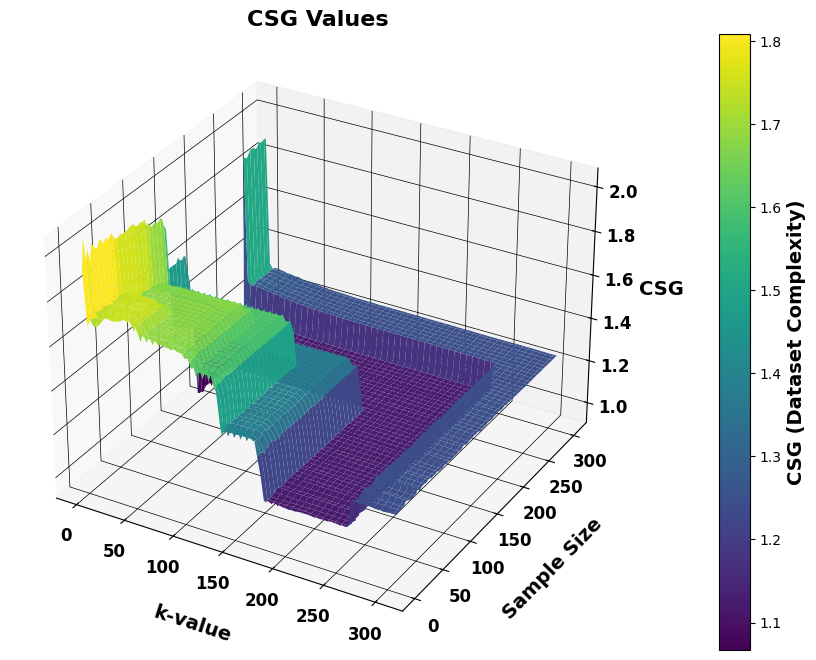

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# File path
file_path = r"D:\Complexities_papers\data.csv"

try:
    # Load data
    df = pd.read_csv(file_path, index_col=0)
    df.index = [f"Sample_size{i+1}" for i in range(len(df))]
    k_values_cols = [col for col in df.columns if col.startswith('k=')]
    sample_sizes = np.arange(1, len(df) + 1)
    k_values = [int(col.split('=')[1]) for col in k_values_cols]

    if df.empty:
        print("Error: The CSV file is empty.")
    elif not k_values_cols:
        print("Error: No columns with the format 'k=...' found in the CSV.")
    else:
        print("Data loaded successfully for 3D surface plot.")

        # Reshape data to long format
        df_long = df.reset_index().melt(id_vars='index', var_name='k_str', value_name='CSG')
        df_long['k'] = df_long['k_str'].str.split('=').str[1].astype(int)
        df_long['Sample_size'] = df_long['index'].str.extract(r'(\d+)').astype(int)

        # Generate meshgrid
        xi = np.linspace(min(k_values), max(k_values), 100)
        yi = np.linspace(min(sample_sizes), max(sample_sizes), 100)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolation
        zi = griddata((df_long['k'], df_long['Sample_size']), df_long['CSG'], (xi, yi), method='cubic')

        # Plotting
        fig = plt.figure(figsize=(12, 8), facecolor='white')  # White background
        ax = fig.add_subplot(111, projection='3d', facecolor='white')  # White 3D plot bg

        # Make grid lines black
        ax.xaxis._axinfo['grid'].update(color='black', linewidth=0.5)
        ax.yaxis._axinfo['grid'].update(color='black', linewidth=0.5)
        ax.zaxis._axinfo['grid'].update(color='black', linewidth=0.5)

        # Surface plot
        surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

        # Colorbar
        cbar = fig.colorbar(surf, pad=0.1)
        cbar.set_label('CSG (Dataset Complexity)', fontsize=14, fontweight='bold', fontname='DejaVu Sans')

        # Axis Labels
        ax.set_xlabel('k-value', fontsize=14, fontweight='bold', labelpad=15, fontname='DejaVu Sans')
        ax.set_ylabel('Sample Size', fontsize=14, fontweight='bold', labelpad=15, fontname='DejaVu Sans')
        ax.set_zlabel('CSG', fontsize=14, fontweight='bold', labelpad=10, fontname='DejaVu Sans')

        # Bold tick values
        for tick in ax.get_xticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')
        for tick in ax.get_zticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')

        # Title
        plt.title('CSG Values', fontsize=16, fontweight='bold', fontname='DejaVu Sans')

        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Data loaded successfully for 3D surface plot.


C:\Users\Haji\AppData\Local\Temp\ipykernel_14020\2001614346.py:82: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


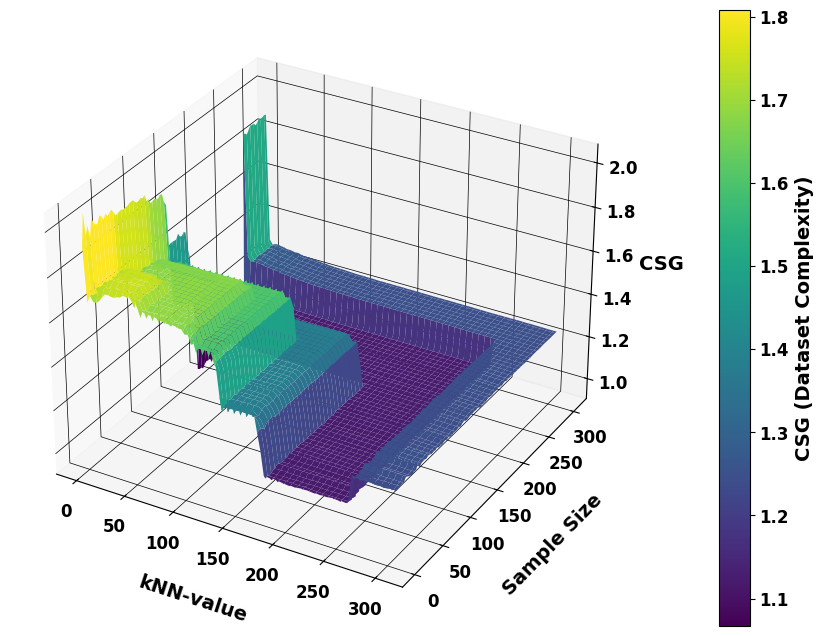

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# File path
file_path = r"D:\Complexities_papers\data.csv"

try:
    # Load data
    df = pd.read_csv(file_path, index_col=0)
    df.index = [f"Sample_size{i+1}" for i in range(len(df))]
    k_values_cols = [col for col in df.columns if col.startswith('k=')]
    sample_sizes = np.arange(1, len(df) + 1)
    k_values = [int(col.split('=')[1]) for col in k_values_cols]

    if df.empty:
        print("Error: The CSV file is empty.")
    elif not k_values_cols:
        print("Error: No columns with the format 'k=...' found in the CSV.")
    else:
        print("Data loaded successfully for 3D surface plot.")

        # Reshape data to long format
        df_long = df.reset_index().melt(id_vars='index', var_name='k_str', value_name='CSG')
        df_long['k'] = df_long['k_str'].str.split('=').str[1].astype(int)
        df_long['Sample_size'] = df_long['index'].str.extract(r'(\d+)').astype(int)

        # Generate meshgrid
        xi = np.linspace(min(k_values), max(k_values), 100)
        yi = np.linspace(min(sample_sizes), max(sample_sizes), 100)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolation
        zi = griddata((df_long['k'], df_long['Sample_size']), df_long['CSG'], (xi, yi), method='cubic')

        # Plotting
        fig = plt.figure(figsize=(12, 8), facecolor='white')
        ax = fig.add_subplot(111, projection='3d', facecolor='white')

        # Make grid lines black
        ax.xaxis._axinfo['grid'].update(color='black', linewidth=0.5)
        ax.yaxis._axinfo['grid'].update(color='black', linewidth=0.5)
        ax.zaxis._axinfo['grid'].update(color='black', linewidth=0.5)

        # Surface plot
        surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')

        # Colorbar
        cbar = fig.colorbar(surf, pad=0.1)
        cbar.set_label('CSG (Dataset Complexity)', fontsize=14, fontweight='bold', fontname='DejaVu Sans')

        # Bold and resize colorbar tick labels
        cbar.ax.tick_params(labelsize=12)
        for tick_label in cbar.ax.get_yticklabels():
            tick_label.set_fontweight('bold')
            tick_label.set_fontname('DejaVu Sans')

        # Axis Labels
        ax.set_xlabel('kNN-value', fontsize=14, fontweight='bold', labelpad=15, fontname='DejaVu Sans')
        ax.set_ylabel('Sample Size', fontsize=14, fontweight='bold', labelpad=15, fontname='DejaVu Sans')
        ax.set_zlabel('CSG', fontsize=14, fontweight='bold', labelpad=10, fontname='DejaVu Sans')

        # Axis Tick Labels
        for tick in ax.get_xticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')
        for tick in ax.get_yticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')
        for tick in ax.get_zticklabels():
            tick.set_fontsize(12)
            tick.set_fontname('DejaVu Sans')
            tick.set_fontweight('bold')

        # Title
        #plt.title('CSG Values', fontsize=16, fontweight='bold', fontname='DejaVu Sans')

        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")
